### Embeddings generator

In [2]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
from sentence_transformers import SentenceTransformer


df = pd.read_csv("../data/train.csv", sep = ";")


# -------------------- First Step --------------------
def compile_text(x):

    text =  f"""Age: {x['age']},  
                housing load: {x['housing']}, 
                Job: {x['job']}, 
                Marital: {x['marital']}, 
                Education: {x['education']}, 
                Default: {x['default']}, 
                Balance: {x['balance']}, 
                Personal loan: {x['loan']}, 
                contact: {x['contact']}
            """

    return text

sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()

# -------------------- Second Step --------------------

model = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")
output = model.encode(sentences=sentences,
         show_progress_bar=True,
         normalize_embeddings=True)

df_embedding = pd.DataFrame(output)
df_embedding

/home/anuj/Installs/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/anuj/Installs/miniconda3/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/home/anuj/Installs/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


2023-10-08 08:51:38.600170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Batches: 100%|██████████| 1413/1413 [03:15<00:00,  7.24it/s]


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.089371,0.027528,0.063023,0.044975,-0.054418,-0.012850,-0.070131,-0.022533,-0.017682,0.006041,...,0.026717,-0.005122,0.055764,0.010242,-0.032108,-0.018127,0.146969,-0.043129,-0.036687,0.042422
1,0.085275,0.031501,0.066245,0.036793,-0.071395,-0.040375,-0.019186,-0.004945,-0.056932,-0.021438,...,0.017155,0.006138,0.046330,-0.002109,-0.049859,-0.025412,0.148697,-0.029367,-0.032046,0.043983
2,0.121005,0.029875,0.045411,0.019558,-0.050014,-0.023849,-0.042146,-0.018952,-0.041870,-0.003948,...,0.024151,-0.018362,0.053265,0.028722,-0.017203,-0.045644,0.148849,-0.039914,-0.027456,0.036846
3,0.055014,0.026345,0.059065,0.023743,-0.060745,0.007165,-0.043051,-0.013688,-0.031898,-0.001887,...,0.023308,-0.018326,0.037705,0.004347,-0.021044,-0.037518,0.104361,-0.040841,-0.059975,0.026863
4,0.058183,0.045889,0.061221,0.050159,-0.037616,-0.036475,-0.011814,-0.024745,-0.053303,-0.025901,...,0.021977,0.006565,0.019004,0.023848,-0.026314,-0.015430,0.140473,-0.041843,-0.065740,0.050011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.069572,0.057374,0.088667,0.024981,-0.070966,-0.039800,-0.025262,0.028524,-0.029249,0.021848,...,0.000726,-0.018771,0.034552,0.003747,-0.033011,-0.059363,0.136304,-0.041702,-0.023181,0.058722
45207,0.046960,0.059676,0.082323,0.045466,-0.057204,-0.015255,-0.018036,0.025801,-0.037520,0.013705,...,0.007779,-0.035330,0.020607,0.011812,-0.041297,-0.073834,0.165493,-0.043818,-0.052799,0.072776
45208,0.048488,0.072749,0.090962,0.037147,-0.050061,-0.030525,-0.035279,0.023155,-0.031951,0.018903,...,0.002846,-0.031359,0.020872,0.021867,-0.028925,-0.072150,0.140813,-0.037865,-0.058702,0.082723
45209,0.062307,0.037126,0.061555,0.024943,-0.065427,0.011139,-0.035926,-0.006024,-0.030161,0.019235,...,0.028558,-0.022575,0.044311,-0.000510,-0.014832,-0.035661,0.088315,-0.036298,-0.079841,0.065593


In [5]:
df_embedding.to_csv("../data/embedding_train.csv", index=False)

### Model

In [10]:
# Normal Dataset
df = pd.read_csv("../data/train.csv", sep = ";")
df = df.iloc[:, 0:8]

# Embedding Dataset
data = pd.read_csv("../data/embedding_train.csv", sep = ",")

In [11]:
from pyod.models.ecod import ECOD

clf = ECOD()
clf.fit(data)
outliers = clf.predict(data) 

data["outliers"] = outliers

# Data without outliers
data_no_outliers = data[data["outliers"] == 0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

print(data_no_outliers.shape) 
print(data_with_outliers.shape) 

(40690, 384)
(45211, 384)


In [18]:
df_embedding_no_out = data_no_outliers
df_no_outliers = df[data["outliers"] == 0]

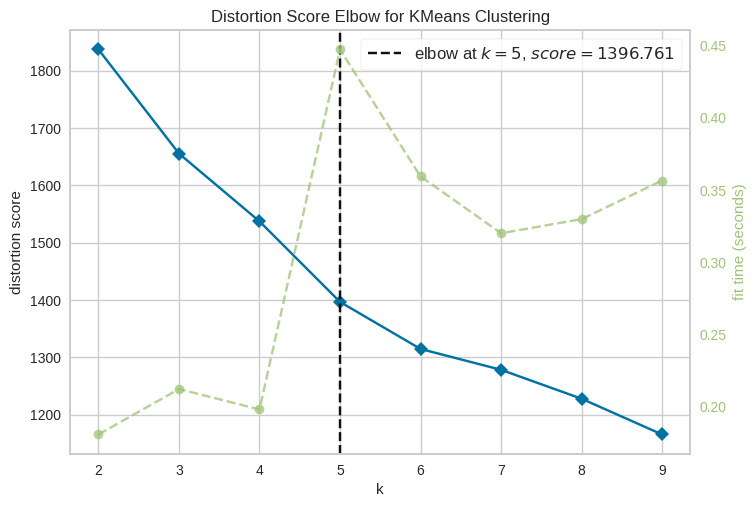

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(data_no_outliers)        # Fit the data to the visualizer
visualizer.show() 

In [13]:
n_clusters = 5
clusters = KMeans(n_clusters=n_clusters, init = "k-means++").fit(df_embedding_no_out)
print(clusters.inertia_)
clusters_predict = clusters.predict(df_embedding_no_out)

/home/anuj/Installs/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1420.6380364252407


In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure 
of each cluster with its most similar cluster, where similarity 
is the ratio of within-cluster distances to between-cluster distances.

The minimum value of the DB Index is 0, whereas a smaller 
value (closer to 0) represents a better model that produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.

Calinski Harabaz Index is defined as the ratio of the 
sum of between-cluster dispersion and of within-cluster dispersion.

The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")


"""
The silhouette score is a metric used to calculate the goodness of 
fit of a clustering algorithm, but can also be used as 
a method for determining an optimal value of k (see here for more).

Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either
the data or the value of k is incorrect.

1 is the ideal value and indicates that clusters are very 
dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")


Davies bouldin score: 1.876253974312141
Calinski Score: 7025.311669674122
Silhouette Score: 0.17294374276775795


[LightGBM] [Warning] Unknown parameter: colsample_by_tree


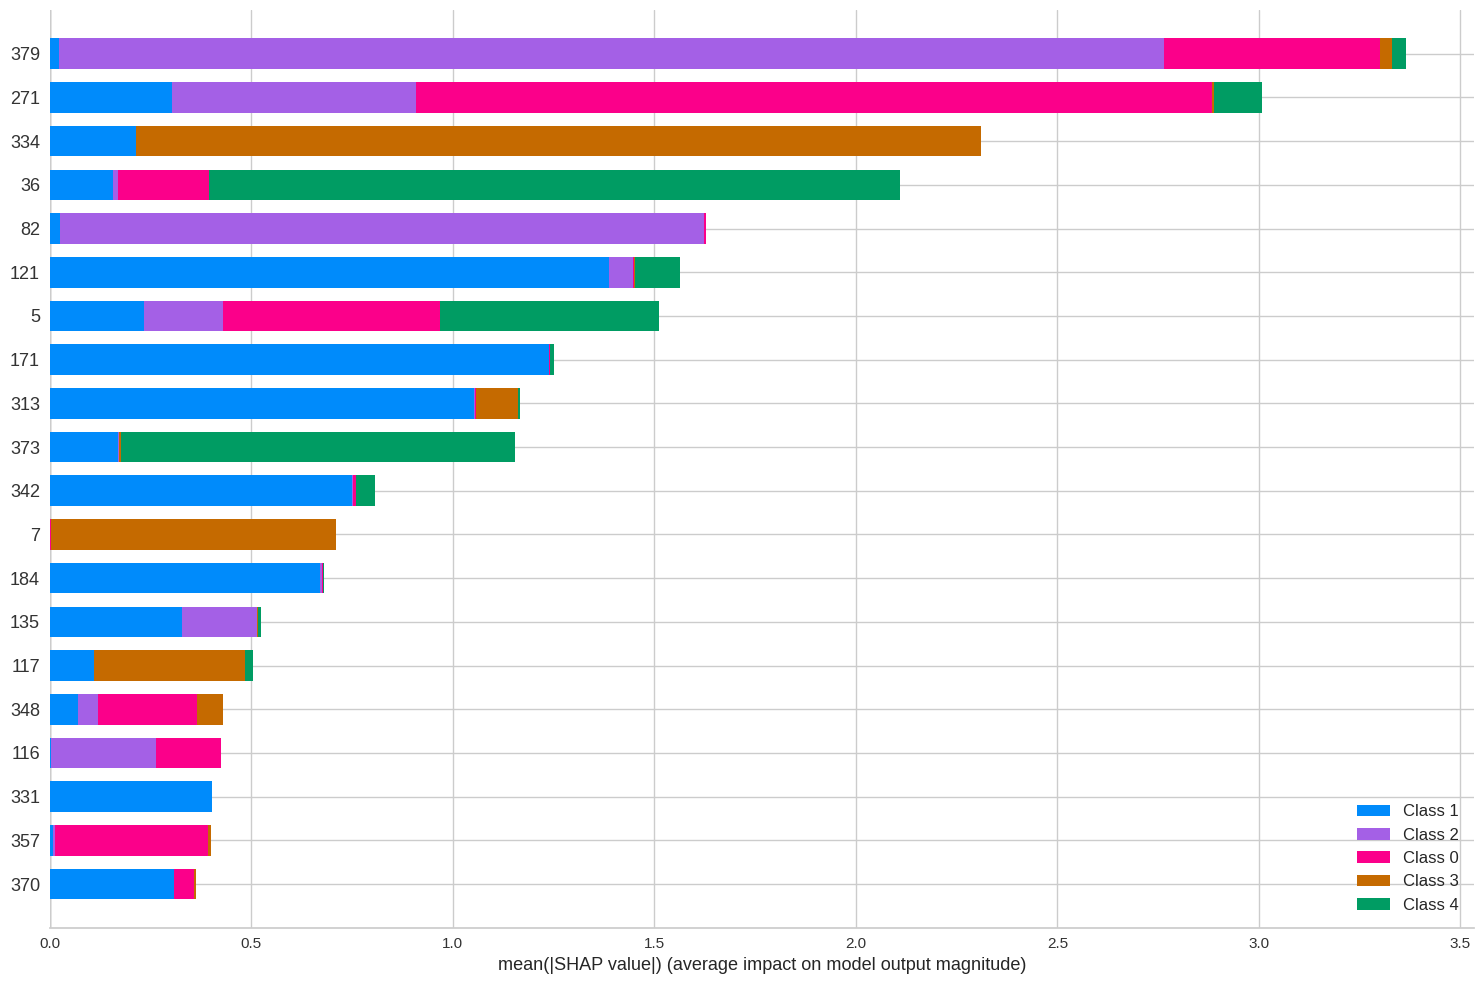

In [21]:
import lightgbm as lgb
import shap

# We create the LGBMClassifier model and train it
clf_km = lgb.LGBMClassifier(colsample_by_tree=0.8)
clf_km.fit(X=data_no_outliers, y=clusters_predict)

#SHAP values
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(data_no_outliers)
shap.summary_plot(shap_values_km, data_no_outliers, plot_type="bar", plot_size=(15, 10))

In [17]:
df_no_outliers = df[data.outliers == 0]
df_no_outliers["cluster"] = clusters_predict

df_no_outliers.groupby('cluster').agg(
    {
        'job': lambda x: x.value_counts().index[0],
        'marital': lambda x: x.value_counts().index[0],
        'education': lambda x: x.value_counts().index[0],
        'housing': lambda x: x.value_counts().index[0],
        'loan': lambda x: x.value_counts().index[0],
        # 'contact': lambda x: x.value_counts().index[0],
        'age':'mean',
        'balance': 'mean',
        'default': lambda x: x.value_counts().index[0],
        
    }
).reset_index()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,cluster,job,marital,education,housing,loan,age,balance,default
0,0,blue-collar,married,secondary,yes,no,39.920595,1124.880305,no
1,1,management,married,tertiary,no,no,41.232745,1513.366449,no
2,2,management,married,secondary,yes,no,42.477268,1363.602982,no
3,3,technician,married,secondary,no,no,38.874553,1233.471464,no
4,4,blue-collar,married,secondary,yes,no,40.187429,998.479313,no
